In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os
import sys
sns.set_style('ticks')
sns.set_context('paper')

In [2]:
df = pd.read_csv(r'D:\portfolio\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

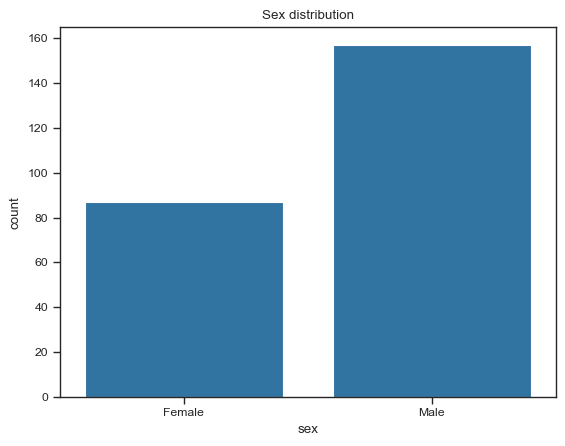

In [4]:
sns.countplot(data=df,x='sex')
plt.title('Sex distribution')
plt.show();

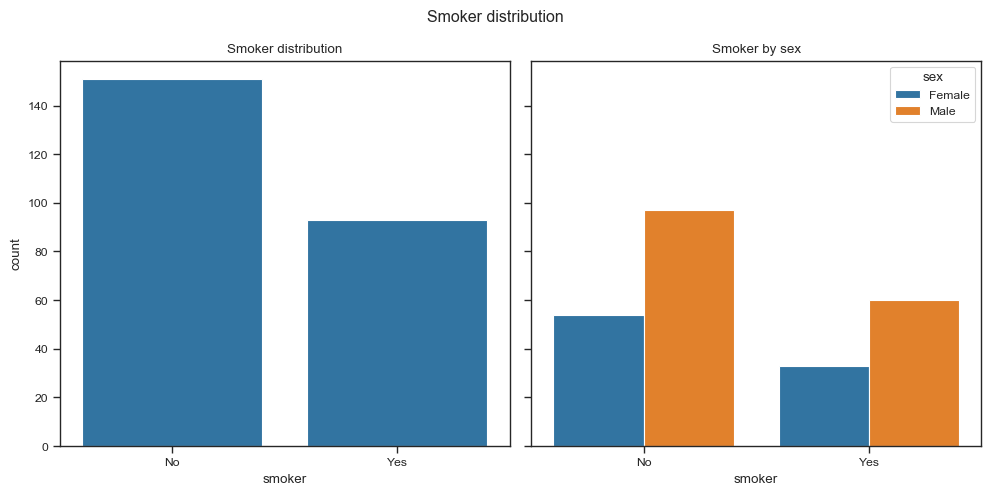

In [5]:
fig,ax = plt.subplots(1,2,figsize=(10,5),sharey=True)
sns.countplot(data=df,x='smoker',ax=ax[0])
sns.countplot(data=df,x='smoker',hue='sex',ax=ax[1])
ax[0].set_title('Smoker distribution')
ax[1].set_title('Smoker by sex')
plt.suptitle('Smoker distribution')
plt.tight_layout()
plt.show();

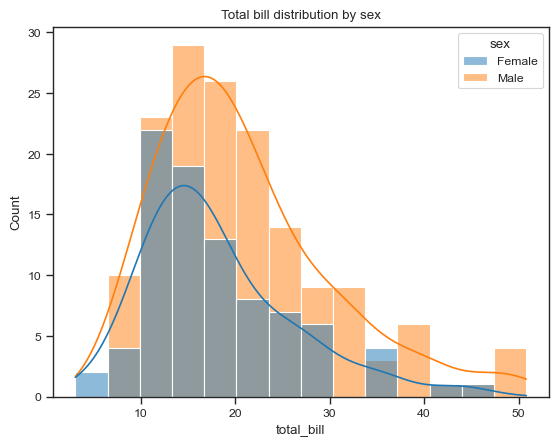

In [6]:
sns.histplot(data=df,x='total_bill',hue='sex',kde=True);
plt.title('Total bill distribution by sex')
plt.show();

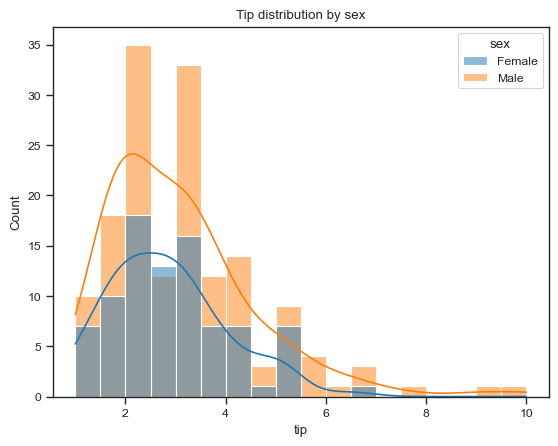

In [7]:
sns.histplot(data=df,x='tip',hue='sex',kde=True);
plt.title('Tip distribution by sex')
plt.show();

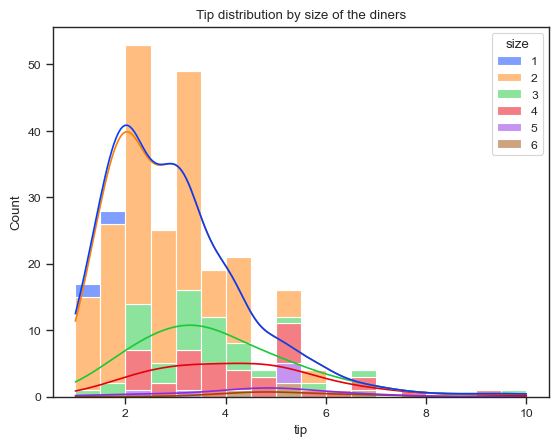

In [8]:
sns.histplot(data=df,x='tip',hue='size',kde=True,palette='bright',multiple='stack');
plt.title('Tip distribution by size of the diners')
plt.show();

In [9]:
print(f'Max tip: {df.tip.max()}')
print(f'Min tip: {df.tip.min()}')
print(f'Mean tip: {df.tip.mean()}')

Max tip: 10.0
Min tip: 1.0
Mean tip: 2.99827868852459


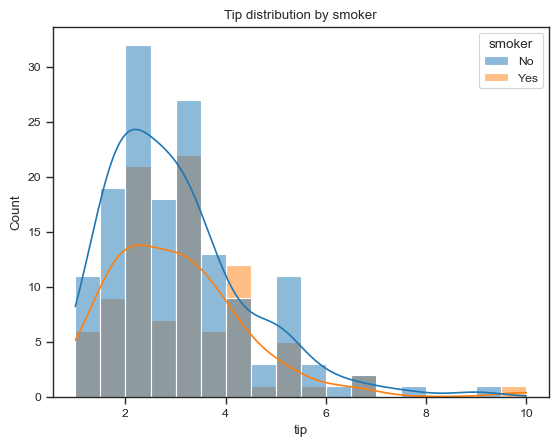

In [10]:
sns.histplot(data=df,x='tip',hue='smoker',kde=True);
plt.title('Tip distribution by smoker')
plt.show();

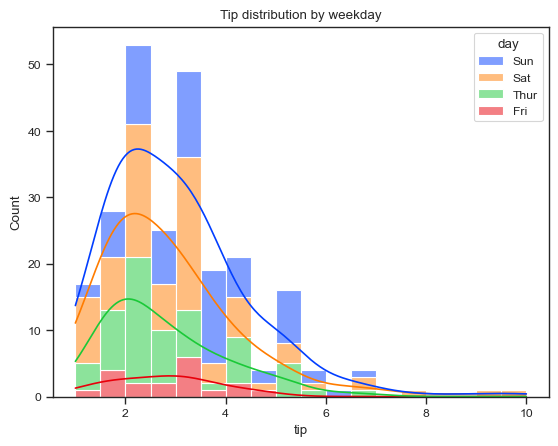

In [11]:
sns.histplot(data=df,x='tip',hue='day',kde=True,palette='bright',multiple='stack');
plt.title('Tip distribution by weekday')
plt.show();

In [12]:
#correlation between total bill and tip
df_corr = df[['total_bill','tip']]
df_corr.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


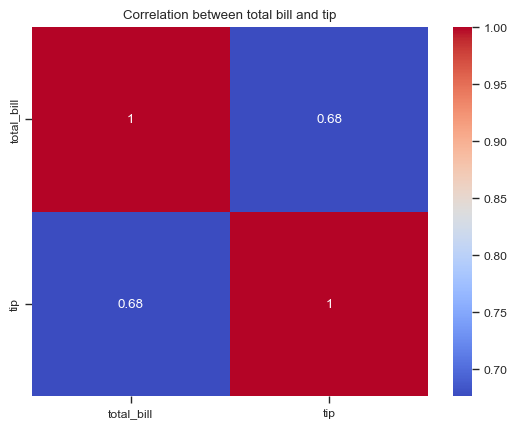

In [13]:
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between total bill and tip')
plt.show();

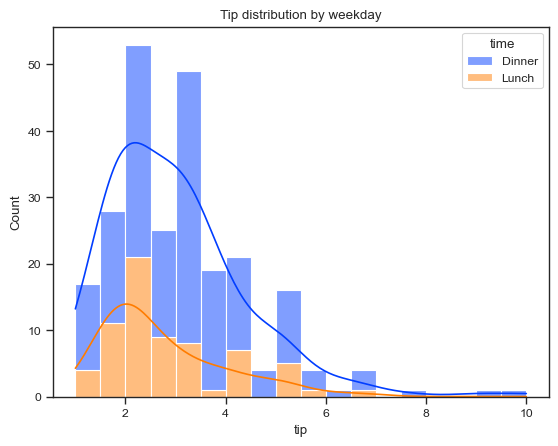

In [14]:
sns.histplot(data=df,x='tip',hue='time',kde=True,palette='bright',multiple='stack');
plt.title('Tip distribution by weekday')
plt.show();

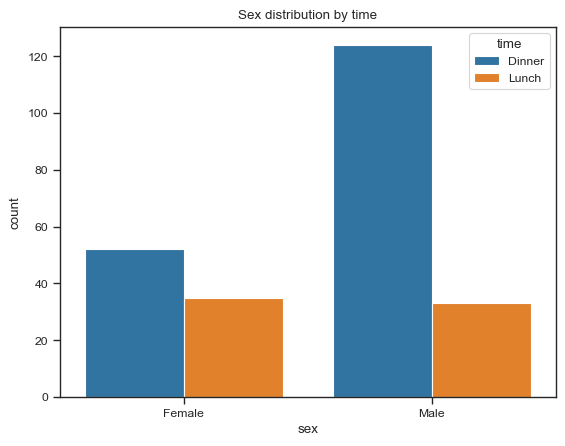

In [15]:
sns.countplot(data=df,x='sex',hue='time')
plt.title('Sex distribution by time')
plt.show();

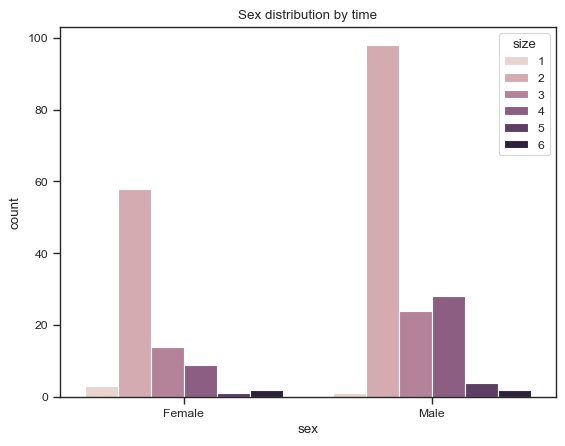

In [16]:
sns.countplot(data=df,x='sex',hue='size')
plt.title('Sex distribution by time')
plt.show();

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tqdm.notebook import tqdm

In [18]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [19]:
num_cols = ['total_bill','tip']
cat_cols = ['sex','smoker','day','time','size']

In [20]:
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)


In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,1
1,10.34,1.66,1,0,2,0,2
2,21.01,3.50,1,0,2,0,2
3,23.68,3.31,1,0,2,0,1
4,24.59,3.61,0,0,2,0,3


In [22]:
X = df.drop('tip',axis=1)
y = df['tip']
print(X.shape)
print(y.shape)

(244, 6)
(244,)


In [23]:
models = {'LinearRegression':LinearRegression(),
          'RandomForestRegressor':RandomForestRegressor(),
          'XGBRegressor':XGBRegressor()}

mse = []
mae = []
r2 = []

In [24]:
for i in tqdm(models):
    print(f'Training {i}')
    model = models[i]
    model.fit(X,y)
    y_pred = model.predict(X)
    mse.append(mean_squared_error(y,y_pred))
    mae.append(mean_absolute_error(y,y_pred))
    r2.append(r2_score(y,y_pred))
    print(f'MSE: {mean_squared_error(y,y_pred)}')
    print(f'MAE: {mean_absolute_error(y,y_pred)}')
    print(f'R2: {r2_score(y,y_pred)}')
    print('-----------------------')

  0%|          | 0/3 [00:00<?, ?it/s]

Training LinearRegression
MSE: 1.01283746746327
MAE: 0.7366436664182882
R2: 0.4687753354583565
-----------------------
Training RandomForestRegressor
MSE: 0.14848221081967203
MAE: 0.281495081967213
R2: 0.9221223393022412
-----------------------
Training XGBRegressor
MSE: 0.0028306772950707436
MAE: 0.03899158210050864
R2: 0.9985153337580749
-----------------------


In [25]:
mse = pd.DataFrame(mse,index=models.keys())
mae = pd.DataFrame(mae,index=models.keys())
r2 = pd.DataFrame(r2,index=models.keys())

df_metrics = pd.concat([mse,mae,r2],axis=1)
df_metrics.columns = ['MSE','MAE','R2']
df_metrics.head()

,MSE,MAE,R2
LinearRegression,1.012837,0.736644,0.468775
RandomForestRegressor,0.148482,0.281495,0.922122
XGBRegressor,0.002831,0.038992,0.998515


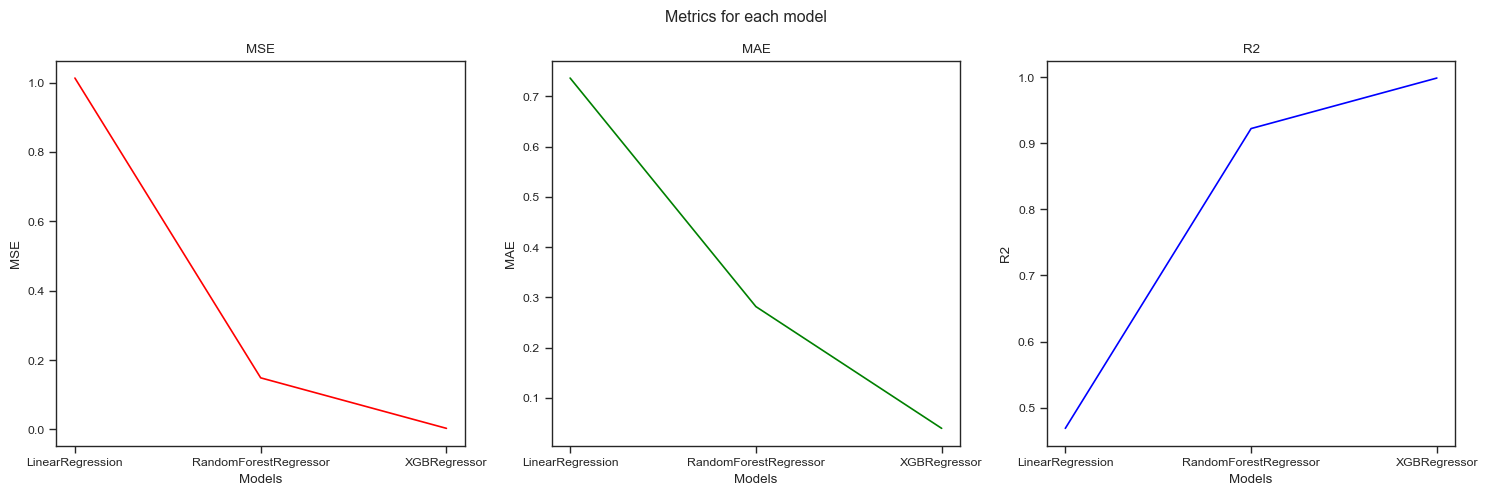

In [26]:
#plot metrics for each model separately
fig,ax = plt.subplots(1,3,figsize=(15,5),sharex=True)
sns.lineplot(data=df_metrics,y='MSE',x=df_metrics.index,ax=ax[0],color='red')
sns.lineplot(data=df_metrics,y='MAE',x=df_metrics.index,ax=ax[1],color='green')
sns.lineplot(data=df_metrics,y='R2',x=df_metrics.index,ax=ax[2],color='blue')
ax[0].set_title('MSE')
ax[1].set_title('MAE')
ax[2].set_title('R2')
ax[0].set_xlabel('Models')
ax[1].set_xlabel('Models')
ax[2].set_xlabel('Models')
plt.suptitle('Metrics for each model')
plt.tight_layout()
plt.show();

In [27]:
##Good model should have low MSE and MAE and high R2
## So here XGBRegressor is the best model

In [28]:
#feature importance from XGBRegressor
xgbreg = XGBRegressor()
xgbreg.fit(X,y)
xgbreg.feature_importances_

array([0.2591565 , 0.07402069, 0.21195383, 0.17513314, 0.08930408,
       0.19043176], dtype=float32)

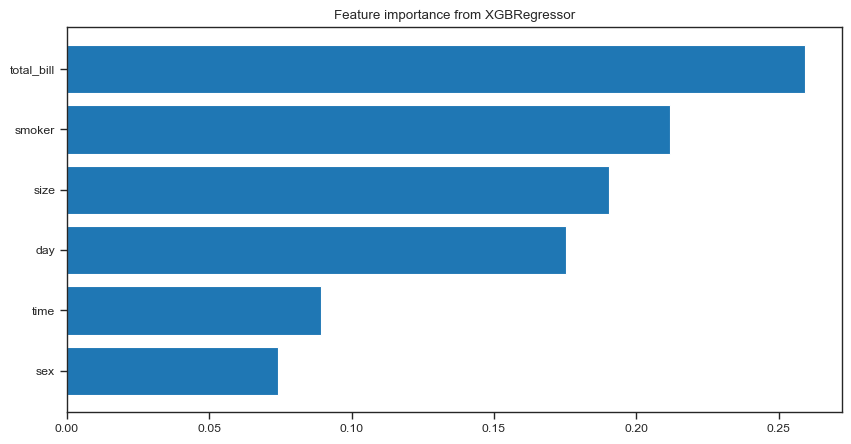

In [29]:
#print feature importances in descending order
sorted_idx = xgbreg.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(X.columns[sorted_idx], xgbreg.feature_importances_[sorted_idx])
plt.title('Feature importance from XGBRegressor')
plt.show();

In [30]:
df['tip_pred'] = xgbreg.predict(X)

In [31]:
df['residual'] = df['tip'] - df['tip_pred']

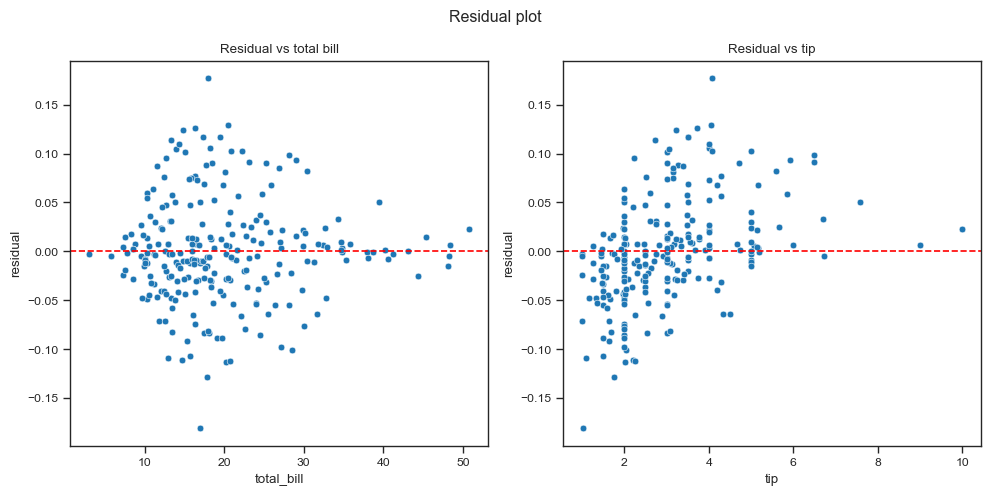

In [32]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x='total_bill',y='residual',ax=ax[0])
sns.scatterplot(data=df,x='tip',y='residual',ax=ax[1])
ax[0].axhline(0,color='red',linestyle='--')
ax[1].axhline(0,color='red',linestyle='--')
ax[0].set_title('Residual vs total bill')
ax[1].set_title('Residual vs tip')
plt.suptitle('Residual plot')
plt.tight_layout()
plt.show();

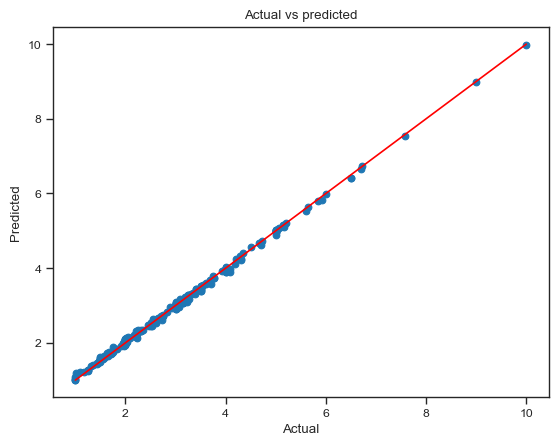

In [33]:
#actual vs predicted
plt.scatter(df['tip'],df['tip_pred'])
plt.plot([min(df['tip']),max(df['tip'])],[min(df['tip']),max(df['tip'])],'r')
plt.title('Actual vs predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show();

In [34]:
#use shap to explain the model
import shap

In [35]:
explain = shap.TreeExplainer(xgbreg)
shap_values = explain.shap_values(X)

[13:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [36]:
print(shap_values.shape)
print(X.shape)

(244, 6)
(244, 6)


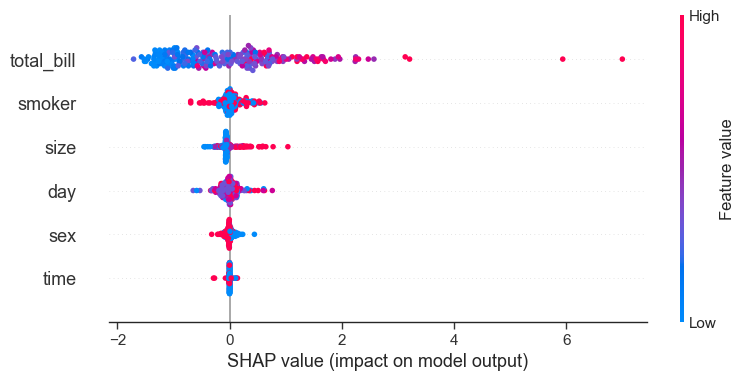

In [37]:
shap.summary_plot(shap_values,X)

In [38]:
print(X.iloc[0])
print(f'outcome for this person: {xgbreg.predict(X.iloc[0].values.reshape(1,-1))}')

total_bill    16.99
sex            0.00
smoker         0.00
day            2.00
time           0.00
size           1.00
Name: 0, dtype: float64
outcome for this person: [1.1909063]


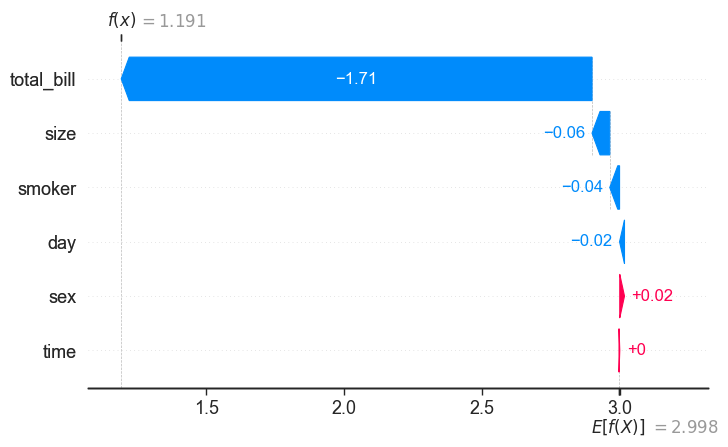

In [39]:
shap.plots._waterfall.waterfall_legacy(explain.expected_value,shap_values[0],feature_names=X.columns)

In [43]:
import pickle as pkl 

In [ ]:
#save the 